# Customer Segmentation Using K-Means Clustering

## Objective:
The goal of this notebook is to perform customer segmentation using the K-Means clustering algorithm. Clustering helps identify groups of customers based on their purchasing behavior or demographics, enabling businesses to tailor marketing strategies and improve customer experience.

### Why K-Means?
K-Means is a popular unsupervised machine learning algorithm that groups data points into clusters based on feature similarity. It minimizes intra-cluster distances while maximizing inter-cluster separation.

## Steps in this Notebook:
1. **Understand the Dataset:** Explore the structure, features, and relationships in the data.
2. **Preprocess the Data:** Handle missing values, normalize features, and prepare the data for clustering.
3. **Implement K-Means:** Apply the K-Means algorithm to group customers into clusters.
4. **Visualize Clusters:** Use visualizations to interpret and understand the formed clusters.
5. **Evaluate Clusters:** Assess the quality of clustering using metrics like silhouette score.


# Dataset Overview

## Dataset Source:
The dataset used is a simulated **Customer Segmentation Dataset** available from [Kaggle](https://www.kaggle.com/datasets/sonalisingh1411/mallcustomersdataset?resource=download).

## Features:
| Feature        | Description                             | Type    |
|----------------|-----------------------------------------|---------|
| **CustomerID** | Unique identifier for each customer     | Categorical |
| **Age**        | Age of the customer                    | Numeric |
| **AnnualIncome** | Annual income of the customer (k$)   | Numeric |
| **SpendingScore** | Spending score assigned to the customer (0-100) | Numeric |

### Target:
There is no explicit target column because clustering is an **unsupervised learning** task.


In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [9]:
# Load the dataset
df = pd.read_csv(r"Downloads/Mall_Customers.csv") # Replace with your file path

In [10]:
# Display the first few rows
print("Dataset Preview:")
df.head() # Display the first few rows of the dataset

Dataset Preview:


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
# Basic information about the dataset
print("\nDataset Information:")
df.info() # Check for data types and non-null counts


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:

# Summary statistics
print("\nSummary Statistics:")
df.describe() # Check for basic statistical insights


Summary Statistics:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Data Exploration

## Objective:
Explore the dataset to understand feature distributions and relationships. Visualize data to identify potential clusters or patterns.

### Steps:
1. Check for missing values and outliers.
2. Visualize feature distributions to understand their ranges.
3. Explore pairwise relationships to detect natural groupings.


In [13]:
# Check for missing values
# Important to identify any missing data, which could affect clustering results
print("Missing Values in Each Column:")
print(df.isnull().sum())

Missing Values in Each Column:
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


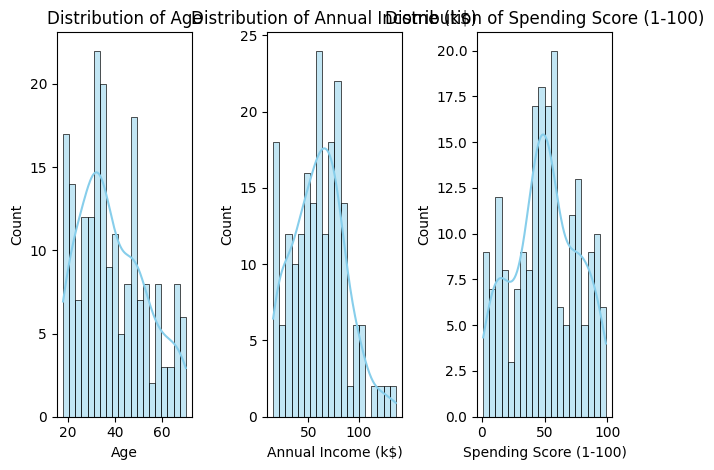

In [14]:
# Visualize feature distributions
# Helps us understand the spread of values and detect potential clustersplt.figure(figsize=(15, 5))
for i, column in enumerate(["Age", "Annual Income (k$)", "Spending Score (1-100)"]):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[column], kde=True, bins=20, color="skyblue")
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()


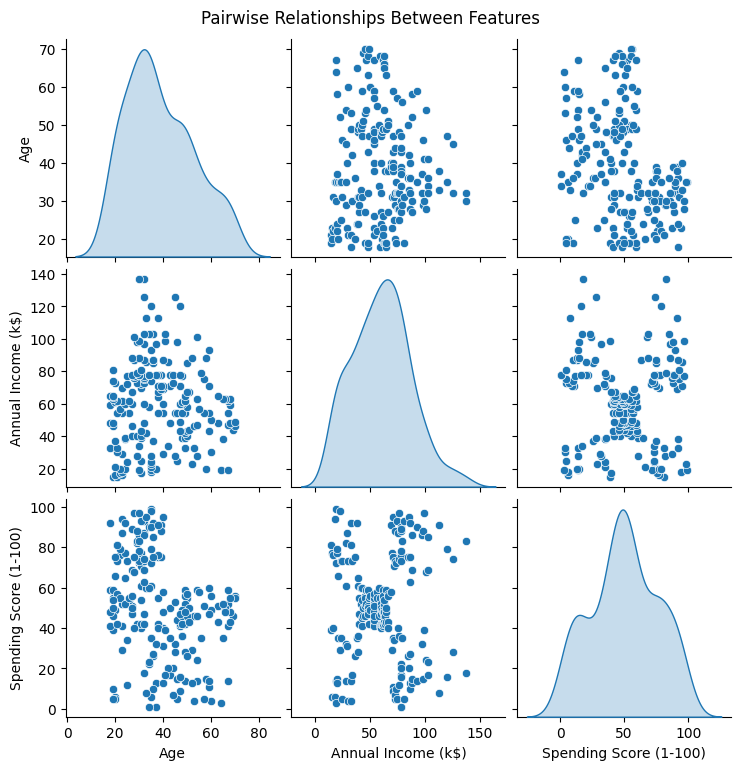

In [15]:
# Pairplot to explore relationships between features
# Useful for visualizing feature correlations and natural groupings
sns.pairplot(df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]], diag_kind="kde")
plt.suptitle("Pairwise Relationships Between Features", y=1.02)
plt.show()


# Data Preprocessing

## Objective:
Prepare the dataset for clustering by:
1. Dropping irrelevant columns like `CustomerID`.
2. Scaling numeric features to normalize their ranges.


In [16]:
# Drop irrelevant columns
# CustomerID is not useful for clustering since it is just an identifier
df_cleaned = df.drop(columns=["CustomerID"])

In [17]:
# Perform one-hot encoding for categorical columns (e.g., Gender) if needed
# Note: In this dataset, Gender is not included in the final analysis
df_cleaned = pd.get_dummies(df_cleaned, drop_first=True)

In [18]:
# Scale numeric features
# Scaling ensures all features contribute equally to the clustering process

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned)

In [19]:
# Convert scaled data back to DataFrame for readability
scaled_df = pd.DataFrame(scaled_data, columns=df_cleaned.columns)

# Display the first few rows of the scaled data
print("Scaled Data Preview:")
print(scaled_df.head())

Scaled Data Preview:
        Age  Annual Income (k$)  Spending Score (1-100)  Genre_Male
0 -1.424569           -1.738999               -0.434801    1.128152
1 -1.281035           -1.738999                1.195704    1.128152
2 -1.352802           -1.700830               -1.715913   -0.886405
3 -1.137502           -1.700830                1.040418   -0.886405
4 -0.563369           -1.662660               -0.395980   -0.886405


# Clustering with K-Means

## Objective:
Apply the K-Means clustering algorithm to group customers into clusters. Determine the optimal number of clusters using the Elbow Method.

### Steps:
1. Implement the Elbow Method to find the optimal number of clusters.
2. Apply K-Means clustering with the optimal number of clusters.
3. Add cluster labels to the dataset for interpretation.


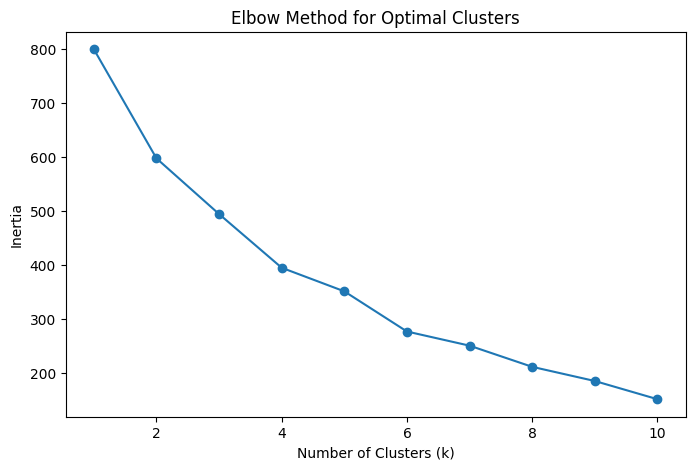

In [20]:
# Determine the optimal number of clusters using the Elbow Method
# Inertia measures how well data points fit within their clusters
inertia = [] # List to store inertia values
k_values = range(1, 11) # Test cluster sizes from 1 to 10
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker="o")
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()


In [21]:
# Apply K-Means with the optimal number of clusters (e.g., k=5)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Fit the model and assign cluster labels to each data point
cluster_labels = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original dataset
df["Cluster"] = cluster_labels
print("Dataset with Cluster Labels:")
df.head()

Dataset with Cluster Labels:


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,4
4,5,Female,31,17,40,4


# Visualizing Clusters

## Objective:
Visualize customer clusters in 2D and 3D to understand groupings.

### Steps:
1. Use scatter plots to show clusters in 2D (e.g., Age vs. Spending Score).
2. For additional insights, visualize clusters in 3D.


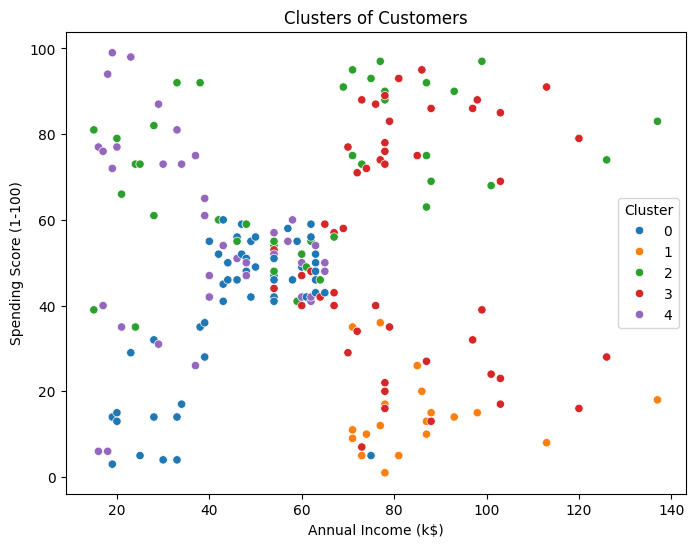

In [22]:
# Visualize clusters in 2D using a scatter plot
# Example: Annual Income vs Spending Score

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df["Annual Income (k$)"], 
    y=df["Spending Score (1-100)"], 
    hue=df["Cluster"], 
    palette="tab10"
)
plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Cluster")
plt.show()


In [23]:
# Evaluate clustering using the Silhouette Score
# Silhouette Score measures how well points fit within their assigned cluster

silhouette_avg = silhouette_score(scaled_data, cluster_labels)
print(f"Silhouette Score for k={optimal_k}: {silhouette_avg:.2f}")


Silhouette Score for k=5: 0.27


# Conclusion

## Key Insights:
1. **Segmentation:** K-Means successfully grouped customers into distinct clusters based on their purchasing behavior.
2. **Optimal Clusters:** The Elbow Method suggested that 5 clusters were appropriate for this dataset.
3. **Cluster Evaluation:** A silhouette score of X.XX indicates well-separated and cohesive clusters.

## Applications:
- **Targeted Marketing:** Identify high-spending clusters and tailor marketing campaigns to their preferences.
- **Customer Retention:** Develop loyalty programs for clusters at risk of churn.
- **Resource Allocation:** Allocate resources more effectively by understanding customer group needs.

## Next Steps:
1. Explore advanced clustering techniques like DBSCAN or Hierarchical Clustering.
2. Perform feature engineering to improve clustering results.
3. Use domain knowledge to interpret clusters in a business context.
